# DIRECTING CUSTOMERS TO SUBSCRIPTION THROUGH APP BEHAVIOUR ANALYSIS

# STEP 1 - DATA ANALYSIS AND PREPROCESSING

In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [44]:
#Import the dataset
dataset = pd.read_csv('datasets/appdata10.csv')

#Inspect the dataset
dataset.head(5)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [45]:
#Data cleaning
dataset['hour'] = dataset.hour.str.slice(1, 3).astype(int)

In [24]:
#Temporary dataframe without specific columns
dataset2 = dataset.copy().drop(columns= ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])
dataset2.head(5)

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


<Figure size 432x288 with 0 Axes>

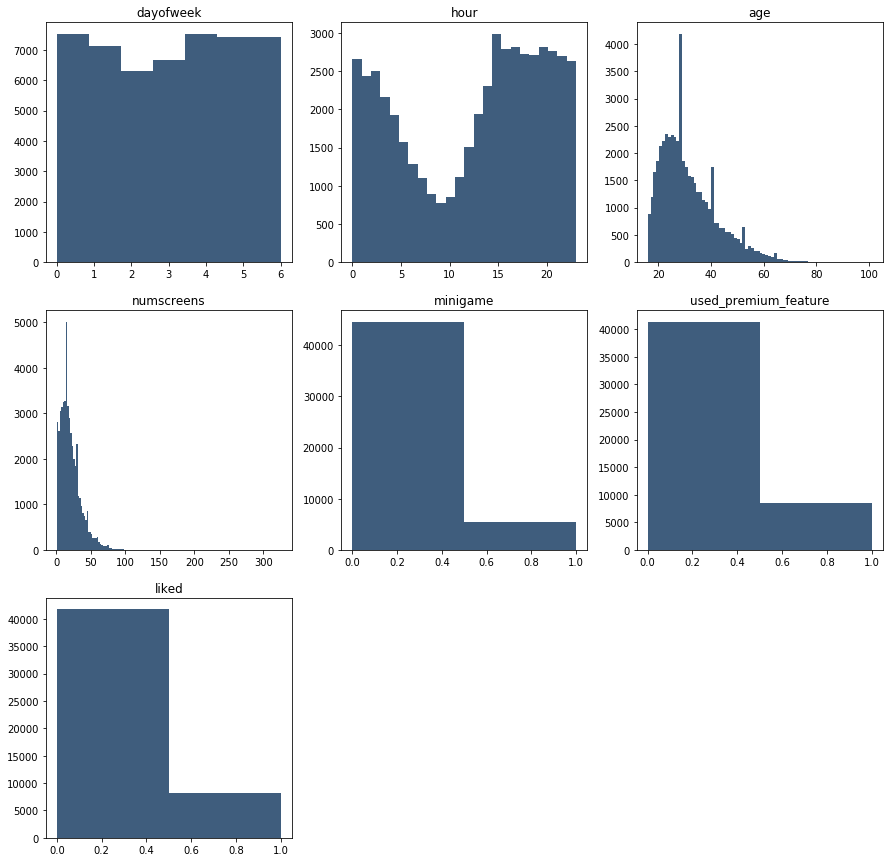

In [25]:
#Plot the histogram to check the distribution
plt.suptitle('Histogram of Numerical Columns', fontsize= 18)
plt.figure(figsize=(15, 15))
for i in range(1, dataset2.shape[1]+1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i-1])
    #Calculating the bins
    vals = np.size(dataset2.iloc[:, i-1].unique())
    
    plt.hist(dataset2.iloc[:, i-1], bins= vals, color= '#3F5D7D')
    

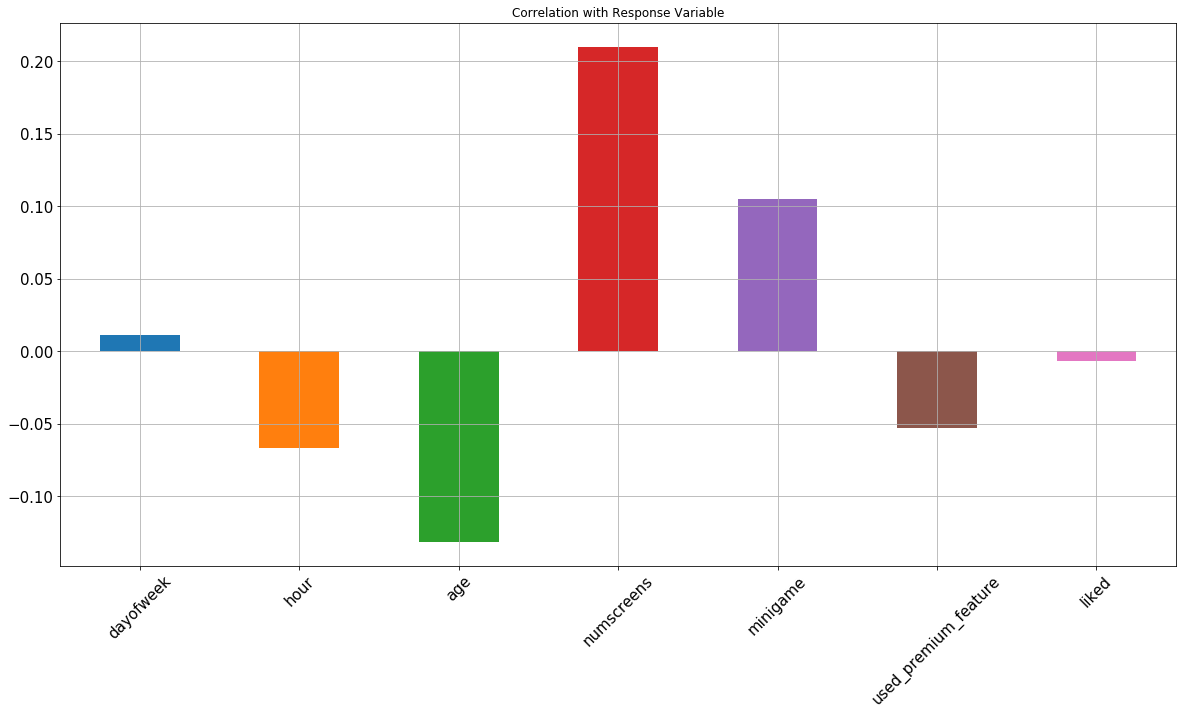

In [28]:
#Correlation with Response - How each features affect the response
dataset2.corrwith(dataset.enrolled).plot.bar(figsize= (20, 10),
                                             title= 'Correlation with Response Variable', fontsize= 15, rot= 45,
                                             grid= True)


Day of the week: not big realtion.
Hour: negative related, the less the hour the less enrolled.
Age: nagative related, the older the person the less likely to enroll.
Number of Screens: positive related, the more number of screens seen the more engaged more likely to enroll.
Minigame: positive related.
Used Premium Feature: negative related.
Liked: not big relation.

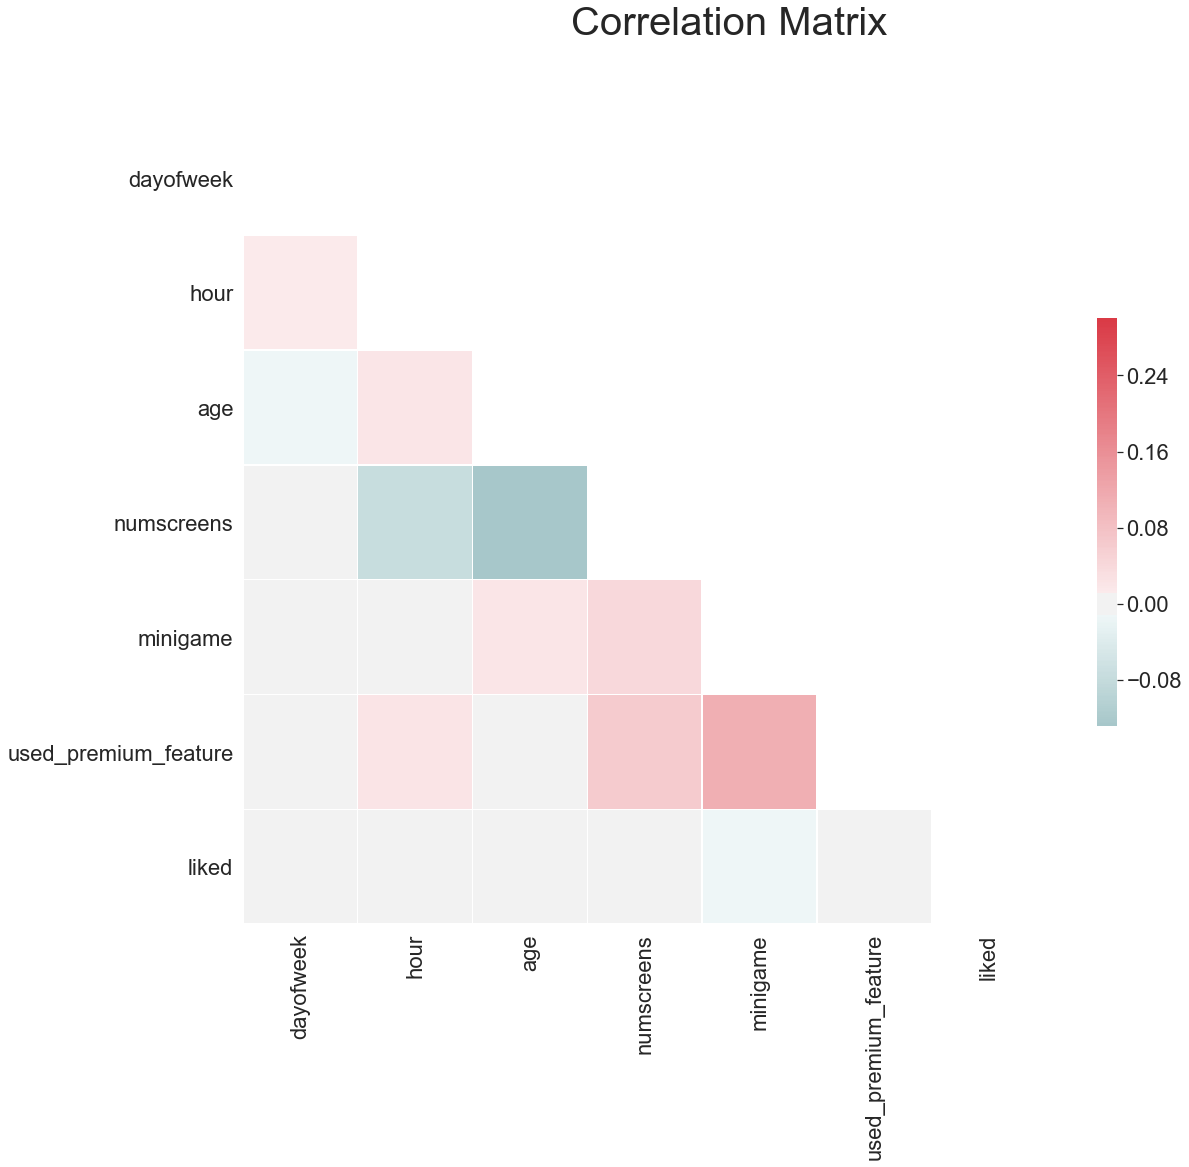

In [35]:
#Correlation Matrix

sns.set(style= 'white', font_scale= 2)

#Compute the Correlation Matrix
corr = dataset2.corr()

#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype= np.bool)
mask[np.triu_indices_from(mask)] = True

#Setup the matplotlib figure
f, ax = plt.subplots(figsize= (18, 15))
f.suptitle('Correlation Matrix', fontsize= 40)

#Generating a custom diverging colour map
cmap = sns.diverging_palette(200, 10, as_cmap= True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask= mask, cmap= cmap, vmax= 0.3, center= 0, square= True, linewidths= 0.5, cbar_kws={'shrink': 0.5})

No linear dipendencies result from the heatmap.

In [46]:
#Feature Engineering
#Convert the data in datetime type
dataset.dtypes
dataset["first_open"] = [parser.parse(row_date) for row_date in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset["enrolled_date"]]

In [47]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [48]:
dataset['difference'] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

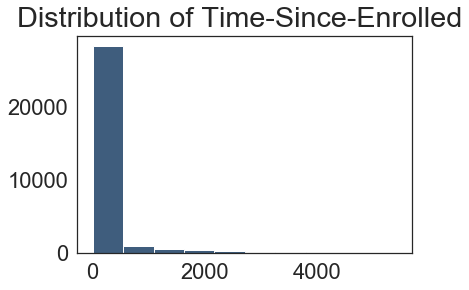

In [51]:
#Plot to check the best hour
plt.hist(dataset['difference'].dropna(), color= '#3F5D7D')
plt.suptitle('Distribution of Time-Since-Enrolled')
plt.show()

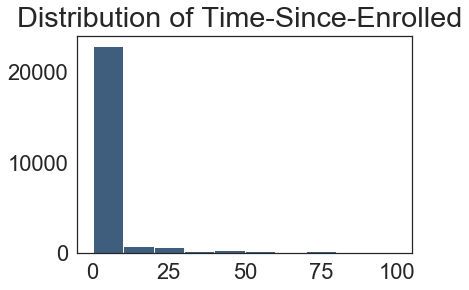

In [52]:
plt.hist(dataset['difference'].dropna(), color= '#3F5D7D', range= [0, 100])
plt.suptitle('Distribution of Time-Since-Enrolled')
plt.show()

In [53]:
#Everything seems to happen in te first 48h
dataset.loc[dataset.difference > 48, 'enrolled'] = 0

In [54]:
#Remove the unecessary columns
dataset = dataset.drop(columns = ['difference', 'enrolled_date', 'first_open'])

In [55]:
#Formatting the screen_list field
top_screens = pd.read_csv('datasets/top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [57]:
dataset['screen_list'] = dataset.screen_list.astype(str) + ','

for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc + ',', '')
    

In [58]:
dataset.head(5)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,",",3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [59]:
dataset['Other'] = dataset.screen_list.str.count(',')

In [60]:
dataset.head(5)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,1,0,0,0,0,0,0,0,0,8
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,254414,1,19,23,",",3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,7
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,11


In [61]:
dataset = dataset.drop(columns= ['screen_list'])

In [62]:
dataset.head(5)

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,8
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,7
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,11


In [64]:
#Funnels for the same sets
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
dataset['SavingsCount'] = dataset[savings_screens].sum(axis= 1)
dataset = dataset.drop(columns = savings_screens)

In [65]:
dataset.head(5)

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,0,8,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,6,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,7,0
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,11,0


In [66]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [67]:
dataset.head(5)

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,8,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,6,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,7,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,11,0,2,0,1


In [68]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,7.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000,5.00000,3.000000,3.000000


In [69]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingsCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [70]:
#Saving the results
dataset.to_csv('new_appdata10.csv', index = False)

# STEP 2 - CREATING THE MODEL

In [71]:
import time

In [74]:
#Data Preprocessing

In [72]:
#Dipendent Variable
response = dataset['enrolled']
#Indipendent Variables
dataset = dataset.drop(columns= 'enrolled')

In [73]:
#Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size= 0.2, random_state= 0)

In [75]:
#Saving away the user id and removing it
train_identifier = X_train['user']
X_train = X_train.drop(columns= 'user')
test_identifier = X_test['user']
X_test = X_test.drop(columns= 'user')

In [76]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

/Users/Ale/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Ale/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/Ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [77]:
#Restoring the columns' names and indexes
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [78]:
#Convert the new training and test set in the original ones
X_train = X_train2
X_test = X_test2

In [79]:
#Building the Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state= 0, penalty= 'l1')
classifier.fit(X_train, y_train)

/Users/Ale/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [80]:
#Predicting the results
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [81]:
#Validating accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.7681

In [82]:
precision_score(y_test, y_pred)

0.7618952017667135

In [83]:
recall_score(y_test, y_pred)

0.7700892857142857

In [84]:
f1_score(y_test, y_pred)

0.7659703300030276

Test Data Accuracy: 0.7681


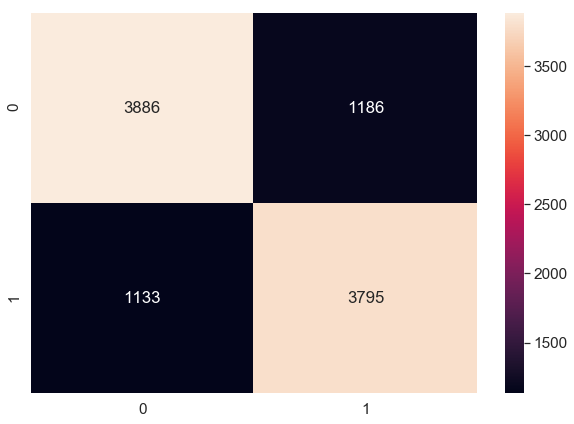

In [86]:
#Plotting the Confusion Matrix
df_cm = pd.DataFrame(cm, index= (0, 1), columns= (0, 1))
plt.figure(figsize= (10, 7))
sns.set(font_scale= 1.4)
sns.heatmap(df_cm, annot= True, fmt= 'g')
print('Test Data Accuracy: %0.4f' % accuracy_score(y_test, y_pred))

In [89]:
# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator= classifier, X= X_train, y= y_train, cv= 10)
print('Logistic Accuracy: %0.3f (+/- %0.3f)' % (accuracies.mean(), accuracies.std()*2))


/Users/Ale/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Ale/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Ale/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Ale/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Ale/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

Logistic Accuracy: 0.767 (+/- 0.009)


In [90]:
#Formatting the Final Results
final_results = pd.concat([y_test, test_identifier], axis= 1).dropna()
final_results['predicted_results'] = y_pred
final_results[['user', 'enrolled', 'predicted_results']].reset_index(drop= True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
5,65042,1,0
6,207226,1,1
7,363062,0,0
8,152296,1,1
9,64484,0,0
